In [1]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

#from subprocess import check_output
#print(check_output(["ls", "./input"]).decode("utf8"))

data = pd.read_csv("./ufcdataset/data.csv")

# Any results you write to the current directory are saved as output.
data.fillna(value=0,inplace=True)
dropdata = data.drop(['B_ID','B_Name','R_ID','R_Name','winby','Date', 'Event_ID','Fight_ID'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                         'RPrev':'R__Prev',
                         'B_Age':'B__Age',
                         'B_Height':'B__Height',
                         'B_Weight':'B__Weight',
                         'R_Age':'R__Age',
                         'R_Height':'R__Height',
                         'R_Weight':'R__Weight',
                         'BStreak':'B__Streak',
                         'RStreak': 'R__Streak'},inplace=True)
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
def percep(X_train,Y_train,X_test,Y_test,Models):
    perceptron = Perceptron()
    perceptron.fit(X_train, Y_train)
    Y_pred = perceptron.predict(X_test)
    Models['Perceptron'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def ranfor(X_train,Y_train,X_test,Y_test,Models):
    randomfor = RandomForestClassifier(max_features="auto",
                                       n_estimators = 1000,
                                       max_depth = None,
                                       n_jobs=-1
                                      )
    randomfor.fit(X_train,Y_train)
    Y_pred = randomfor.predict(X_test)
    Models['Random Forests'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def dec_tree(X_train,Y_train,X_test,Y_test,Models):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    Models['Decision Tree'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def SGDClass(X_train,Y_train,X_test,Y_test,Models):
    sgd = SGDClassifier()
    sgd.fit(X_train, Y_train)
    Y_pred = sgd.predict(X_test)
    Models['SGD Classifier'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def ModelSVC(X_train,Y_train,X_test,Y_test,Models):
    clf = SVC(kernel = 'rbf', gamma = 0.5, C = 3)
    # 'kernel': 'rbf', 'gamma': 0.5, 'C': 3
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    Models['SVM'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def bayes(X_train,Y_train,X_test,Y_test,Models):
    gaussian = GaussianNB()
    gaussian.fit(X_train, Y_train)
    Y_pred = gaussian.predict(X_test)
    Models['Bayes'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def Nearest(X_train,Y_train,X_test,Y_test,Models):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]

def run_all_and_Plot(df):
    Models = dict()
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_all = df.drop(['winner'], axis=1)
    X_all = scaler.fit_transform(X_all)
    y_all = df['winner']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    percep(X_train,Y_train,X_test,Y_test,Models)
    ranfor(X_train,Y_train,X_test,Y_test,Models)
    dec_tree(X_train,Y_train,X_test,Y_test,Models)
    SGDClass(X_train,Y_train,X_test,Y_test,Models)
    ModelSVC(X_train,Y_train,X_test,Y_test,Models)
    bayes(X_train,Y_train,X_test,Y_test,Models)
    Nearest(X_train,Y_train,X_test,Y_test,Models)
    return Models


def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of different models')
    plt.show()


def plot_cm(dict):
    count = 1
    fig = plt.figure(figsize=(10,10))
    for model in dict:
        cm = dict[model][1]
        labels = ['W','L','N','D']
        ax = fig.add_subplot(4,4,count)
        cax = ax.matshow(cm)
        plt.title(model,y=-0.8)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        # plt.subplot(2,2,count)
        count+=1
    plt.tight_layout()
    plt.show()


## Introduction
Mixed Martial Arts is currently one of the fastest growing sports in the world. The UFC or Ultimate Fighting Championship is currently the largest fight promotion in the mixed martial arts world. Between 2013 and 2017 the promotion had presented over 1400 fights and counting, with an event being held typically bimonthly and having multiple fights per event. 

We attempted to evaluate the accuracy of multiple machine learning algorithms in order to determine which method is best suited to predicting fight results given both competitors' records prior to the fight. Though several works have been published that seek to forecast performance of an MMA fighter prior to the fight(https://getd.libs.uga.edu/pdfs/johnson_jeremiah_d_201208_ms.pdf), our team has attempted to create a dataset that reflects each fighter's statistical record prior to each fight and build a predictive model based of this dataset. Thus we should ideally be able to predict a fighter's performance independent of their time  spent as a professional fighter - as in the real world, an experienced fighter would most certainly have an advantage over a novice provided the age difference is not large enough to affect athletic performance. 
Our team evaluated many different machine learning models, and charted their performance over the dataset. Random Forests and SVM gave the best results in terms of prediction accuracy. 

For a brief background of a UFC event night, the UFC is a fighting promotion that promotes mixed martial arts. Mixed Martial Arts as the name implies, employs various techniques from an ensemble of different martial arts such as Jiu Jitsu, Boxing, Taekwondo, Boxing and Wrestling. This allows for a wide variety of strikes and tactics to be employed by the fighters depending on their expertise in each art. A typical UFC event has multiple fights on a particular day - these events take place roughly once every two weeks. Each fight typically lasts 3 rounds of five minutes each though championship fights or big ticket fights between two famous fighters will last 5 rounds of five minutes each. The two fighters are denoted red and blue side, with the better known fighter being allocated the red side. The fighters each get a 30 second break in between rounds in order to strategize for the next round and catch their breadth. There are multiple ways to win a fight, via Knockout/Technical Knockout wherein the fighter overwhelms his opponent with strikes until he is unable to continue, via submission; wherein a fighter locks his opponent in a choke or submission hold and forces them submit, or finally by decision, when the fight reaches the end of the allotted time for the fight and the fighters are judged by a panel of three judges on factors such as damage inflicted, aggression and ring control. Obviously decision victories are the most common, however these are the hardest to judge, as the judging process tends to be rather opague (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2395994, https://link.springer.com/chapter/10.1007%2F978-1-4419-6630-8_7)

Today, statistical modelling and its applications in the UFC is in it's infancy. While most fighters will study prospective opponents during their training camps, no thoroughly rigorous statistical models have been published till date. Our team attempts to correct this imbalance- whilst there remains insufficient data available to build fighter specific models (with the UFC publishing granular fight data only since 2013 and each fighter fighting less than 10 times every year) we have attempted to build a model to predict which fighter is more likely to emerge victorious. In an ideal world, this model can be used to create matchups where both fighters are equally likely to win, as having this sort of equity in winning chance will most likely correlate with more exciting fights, as well as equalizing betting odds for fighters prior to each fight. 

## Data Exploration and Feature Manipulation
Granular fight data is available for UFC fighters by FightMetric LLC. Highly granular data is only available post 2013, thus our team made the assumption that all fighters from that period and beyond start at 0, by collecting and summing statisics per fight, we were able to assemble a tabulation of each fighter's statistics prior to each fight. From this set, we can see that we have a total of 879 Columns and one dependent variable. 
The columns themselves have 4 integer types (Streaks, Previous Wins etc), 5 object types (Names, Winner - basically strings and arrays) and 870 Float types.
Some quick observations - 
1. Red Side seems to win slightly more than blue (867/1477 = 58.7%)
2. Donald Cerrone fights on Red side more than any other fighter, with 11 fights
3. Tim Means fights on Blue side more than any other fighter with 8
4. There are more fighters fighting debut fights. This statistic however could be skewed by the fact that our data set assumes debuts of every fighter in 2013
5. Most Fights are won by decision, and 2015 had the most fights.
We then filled all the Null values in our dataset with 0 values and assigned numeric codes to all categorical values. 
The biggest problem that our dataset currently has is that it's very sparse and the number of samples per feature is very low - since we have 1400 data points and 888 features. Obviously we needed to engineer features and increase the number of samples per feature or reduce the number of features. 
First, we draw a correlation matrix expressed as a heatmap for the top 10 highest correlations 

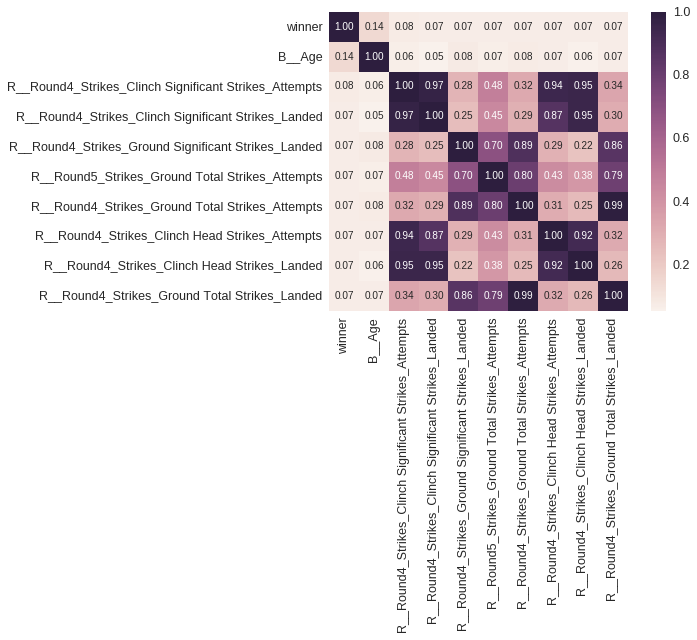

In [2]:
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
dontchange = ['winner','Event_ID','Fight_ID','Max_round','Last_round','B_Age','R_Age']
numeric_cols = [col for col in dropdata if col not in dontchange]
dropdata[numeric_cols] += 1 

As one can see, the highest correlations are with Round4 and Round5 features, since most fights don't have Round4 and Round5 statistics, this is evident of the fact that most of our data samples have 0 or null values in those columns. Instead we sum all of our data values. In an attempt to counter this, we summed the features per round. we also drop the round count features as they are no longer relevant. 

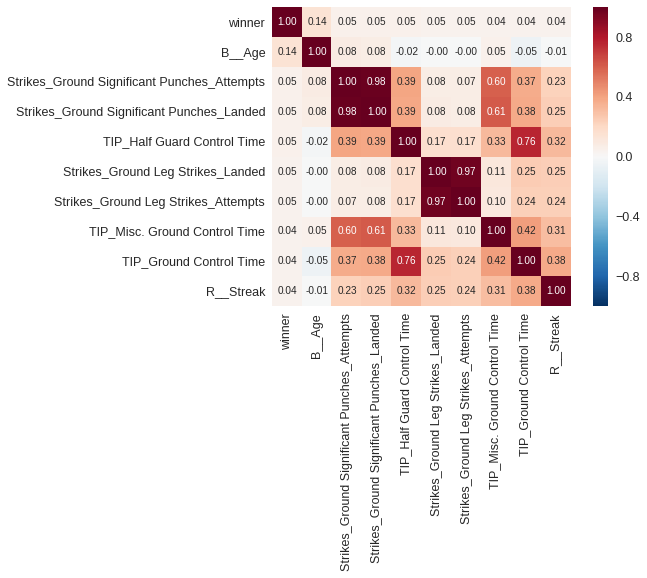

In [3]:
newDF = dropdata.drop(['Max_round','Last_round','B_HomeTown','B_Location','R_HomeTown','R_Location'],axis=1)
blue_cols = [col for col in dropdata.columns if 'B__' in col]
red_cols = [col for col in dropdata.columns if 'R__' in col]
b_feats = list(set([x[10:] for x in blue_cols if "Round" in x]))
r_feats = list(set([x[10:] for x in red_cols if "Round" in x]))
def sumfeat(b_feats,cols):
    for x in b_feats:
        newDF.loc[:,x] = 0
        for y in cols:
            if x in y:
                newDF[x] += newDF[y]
                newDF.drop(y,axis=1,inplace=True)
sumfeat(b_feats,blue_cols)
sumfeat(r_feats,red_cols)
corrmat = newDF.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(newDF[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


Finally, we then attempt to half the number of features again, by taking the ratio of features from red and blue side fighters. 

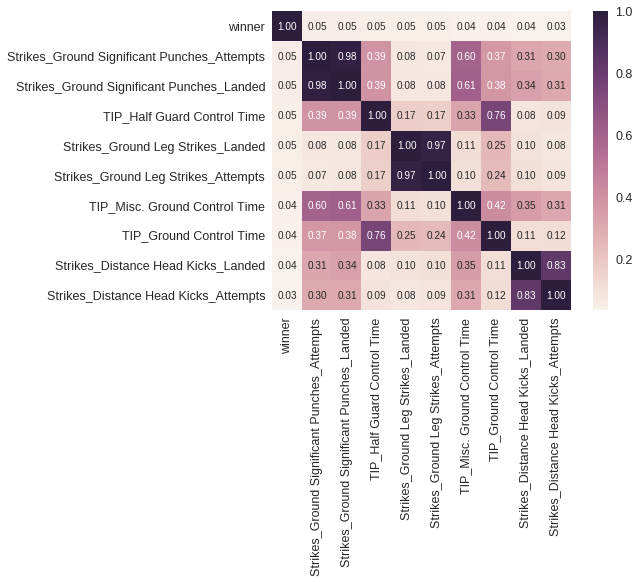

,winner,Strikes_Ground Total Strikes_Landed,Strikes_Ground Total Strikes_Attempts,Strikes_Distance Leg Kicks_Attempts,Strikes_Distance Leg Kicks_Landed,Strikes_Head Significant Strikes_Landed,TIP_Back Control Time,Strikes_Distance Body Punches_Landed,Strikes_Distance Head Strikes_Landed,TIP_Clinch Time,...,Strikes_Ground Significant Kicks_Landed,Strikes_Ground Significant Punches_Attempts,Strikes_Leg Total Strikes_Attempts,Strikes_Head Total Strikes_Landed,Strikes_Distance Leg Strikes_Landed,Prev,Streak,Age,Height,Weight
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,...,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,1.790115,44.448206,53.530806,9.010156,8.293162,55.558565,31.530806,6.862559,38.340555,224.421801,...,5.308057,10.205823,7.372376,80.180772,15.767773,1.038204,1.128959,1.014093,1.000069,0.999239
std,1.460161,57.850249,70.597239,9.240495,7.945788,62.302774,74.533790,5.075654,45.810450,314.130866,...,1.067769,13.948352,7.225331,87.256066,16.948858,0.736193,0.736245,0.646307,0.043146,0.039935
min,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,0.100000,0.111111,0.031250,0.005319,0.789916
25%,0.000000,5.000000,5.000000,5.000000,5.000000,7.000000,5.000000,5.000000,6.000000,5.000000,...,5.000000,5.000000,5.000000,8.000000,5.000000,0.555556,1.000000,0.882353,0.973822,1.000000
50%,3.000000,22.000000,26.000000,5.000000,5.000000,36.000000,5.000000,5.000000,22.000000,110.000000,...,5.000000,5.000000,5.000000,57.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,58.000000,73.000000,8.000000,7.000000,77.000000,11.000000,6.000000,53.000000,323.000000,...,5.000000,7.000000,5.000000,116.000000,20.000000,1.000000,1.000000,1.100000,1.026882,1.000000
max,3.000000,395.000000,472.000000,76.000000,72.000000,468.000000,605.000000,70.000000,397.000000,4338.000000,...,15.000000,136.000000,67.000000,606.000000,149.000000,8.000000,8.000000,25.000000,1.114754,1.202128


In [4]:
ratio = newDF.copy()
blue_cols = [col for col in ratio.columns if 'B__' in col]
red_cols = [col for col in ratio.columns if 'R__' in col]
for (blue,red) in zip(blue_cols,red_cols):
    newkey = ''.join(str(blue).split('_')[2:])
    ratio[newkey] = ratio[str(blue)]/ratio[str(red)]
    del ratio[str(blue)]
    del ratio[str(red)]
corrmat = ratio.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(ratio[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
ratio.describe()

As you can see, this brings the total number of features down to 92. 

## Modeling
We then evaluate the performance of multiple machine learning models on this dataset. We explored a variety of methods on this dataset, from simple clustering methods such as K-Nearest Neighbours to ensemble methods such as Random Forests. 

### Base Line


KNN 0.554054054054
Decision Tree 0.533783783784
SGD Classifier 0.530405405405
Random Forests 0.581081081081
SVM 0.628378378378
Bayes 0.35472972973
Perceptron 0.537162162162


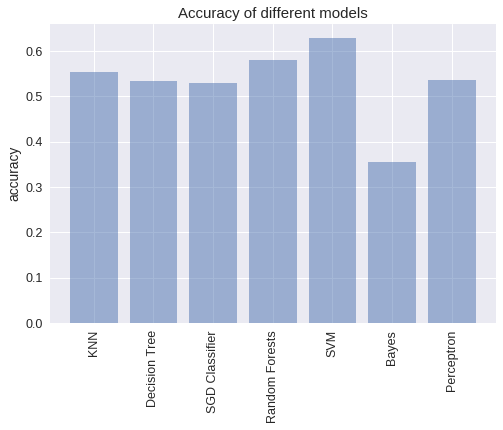

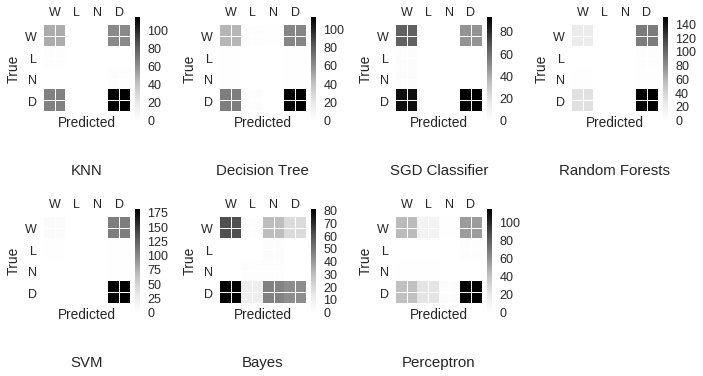

In [5]:
accuracies = run_all_and_Plot(dropdata)
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

### Summed Values

KNN 0.557432432432
Decision Tree 0.516891891892
SGD Classifier 0.550675675676
Random Forests 0.584459459459
SVM 0.577702702703
Bayes 0.202702702703
Perceptron 0.557432432432


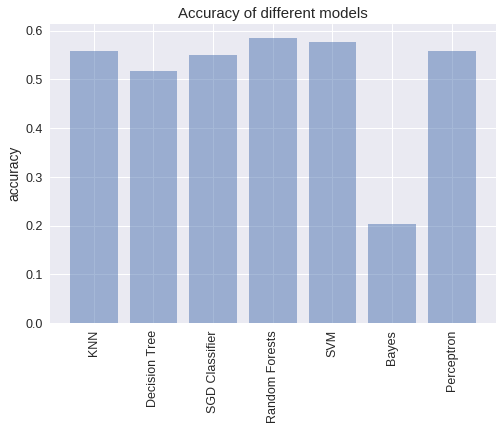

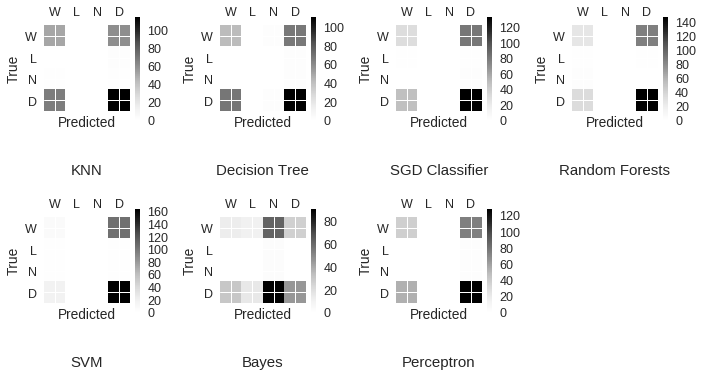

In [6]:
accuracies = run_all_and_Plot(newDF)
# CompareAll = dict()
CompareAll['Summed'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

### Ratio of Features


KNN 0.543918918919
Decision Tree 0.503378378378
SGD Classifier 0.543918918919
Random Forests 0.597972972973
SVM 0.611486486486
Bayes 0.212837837838
Perceptron 0.560810810811


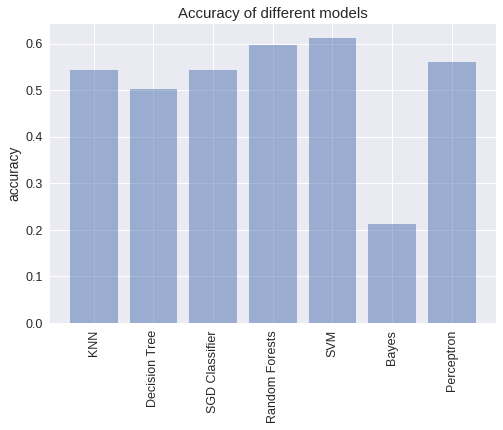

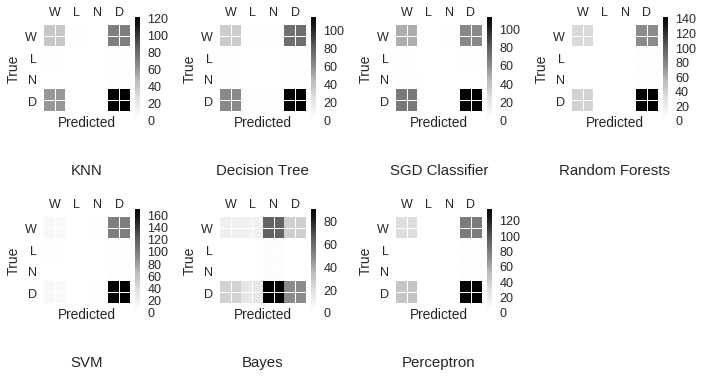

In [7]:
accuracies = run_all_and_Plot(ratio)
# CompareAll = dict()
CompareAll['Ratio'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

## HyperParameter Optimization
We attempt to optimize the hyperparameters for SVM and Random Forests using sklearn's GridSearch CV function. we were able to lock in the best parameters for the SVM and Random Forests models, with SVM we found the RBF kernel used the best results, accompanied with a gamma value of 0.5 and a C value of 3. For Random Forests, we used the auto flag for the number of features, which in sk learn means a square root of the total number of features, with a large number of estimators (1000) per tree. We also did not limit the tree depth, such that every tree in the ensemble could be as long as possible. 


In [8]:
# def opt_svm(df):
#     from sklearn.model_selection import train_test_split
#     from sklearn.preprocessing import StandardScaler
#     X_all = df.drop(['winner'], axis=1)
#     y_all = df['winner']
#     scaler = StandardScaler()
#     X_all = scaler.fit_transform(X_all)
#     X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    
#     from sklearn.model_selection import GridSearchCV 
#     parameters = {'kernel':['linear','rbf'],'C':[1,2,3,4,5,6,7,8,9,10], 'gamma': [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}
#     svr = SVC()
#     grid = GridSearchCV(svr, parameters)
#     grid.fit(X_train, Y_train)
#     print(grid.best_params_)
# foo = opt_svm(ratio)

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV 
# X_all = ratio.drop(['winner'], axis=1)
# y_all = ratio['winner']
# scaler = StandardScaler()
# X_all = scaler.fit_transform(X_all)
# X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
# rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, max_depth=None) 
# param_grid = { 
#    'n_estimators': [200,500,700,1000],
#    'max_features': ['auto', 'sqrt', 'log2']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, Y_train)
# print(CV_rfc.best_params_)


## Results and Discussion
Overall, our team observed that Random Forests and SVM showed the most consistent results against the dataset. Models like Naive Bayes and simple decision trees showed very poor results. The dataset itself has much room for improvement, the assumption that all fighters start from 0 in 2013, coupled with the rise in debut fights for new fighters means that our dataset is very sparse. However, from simply examining the dataset, one can easily see that factors such as fighter age is very relevant to the eventual winner of the fight. Moreover, the Red Side Fighter tends to win more frequently, by a statistically relevant margin. Depending on the model and feature, we exhibit about a 3-6% increase in prediction accuracy from the baseline or zeroR prediction of always picking the red side fighter to win. 
In the future, one can also employ some sort of feature selection mechanism such as univariate feature selection or cross validation techniques to reduce the overfitting in the dataset. Our best predictive model is SVM by far - using hyperparameter optimization we were able to get very consistent results with a predictive accuracy of 61% and a best observed accuracy of 62.8% A future improvement would be to use some sort of gradient boosted algorithms for classification, since the hyperparameter tuning did not produce massively better results in terms of predictive accuracy. The following plot shows the relative predictive accuracy of each model over the three feature manipulations. 

0
1
2
3
4
5
6


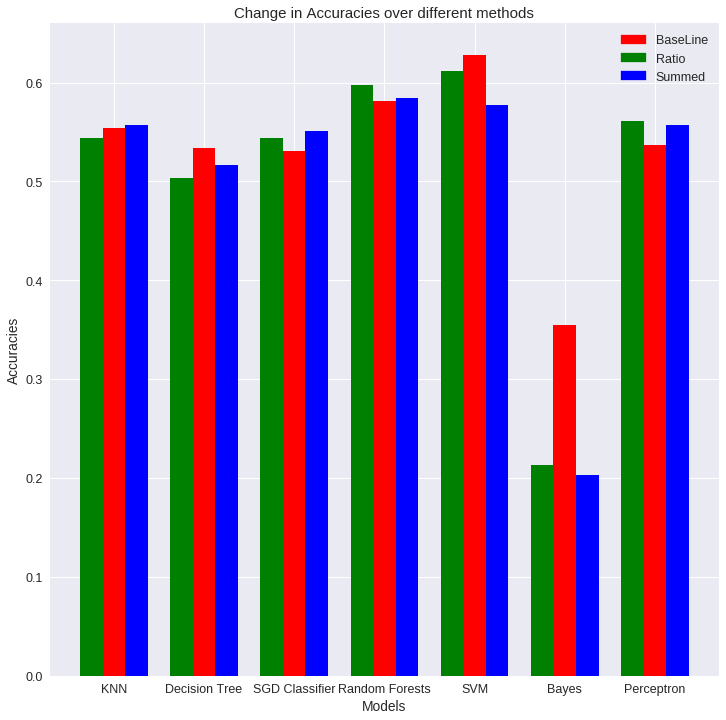

In [10]:
def graph_plot(values):
    import matplotlib.patches as mpatches
    N = 7 #no of models
    ind = np.arange(N)  # the x locations for the groups
    width = 0.25     # the width of the bars
    offset=0
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (12,12)

    order = list()
    for value in values['Ratio']:
        order.append(value[0])
    
    foo_ratio = list()
    foo_baseline = list()
    foo_summed = list()
    for element in values['Ratio']:
        foo_ratio.append(element[1])
    
    
    for element in values['Baseline']:
        foo_baseline.append(element[1])
    
    
    for element in values['Summed']:
        foo_summed.append(element[1])
    
    
    rects = ax.bar(ind+width*offset, foo_ratio, width, color = 'g')
    offset+=1
    rects = ax.bar(ind+width*offset, foo_baseline, width, color = 'r')
    offset+=1
    rects = ax.bar(ind+width*offset, foo_summed, width, color = 'b')
    
#     for key in values:
#         rects = ax.bar(ind+width*offset, values[key], width)
#         # bars.append(rects)
#         offset+=1
    for i in range(0,len(order)):
        print(i)
    
    
    ax.set_ylabel('Accuracies')
    ax.set_xlabel('Models')
    ax.set_title('Change in Accuracies over different methods')
    ax.set_xticks(ind+2*width/2)
    ax.set_xticklabels(order)
    
    
    red_patch = mpatches.Patch(color='red', label='BaseLine')
    green_patch = mpatches.Patch(color='green', label='Ratio')
    blue_patch = mpatches.Patch(color='blue', label='Summed')
    
    
    plt.legend(handles=[red_patch,green_patch,blue_patch])
    
    
    plt.show()


model_accuracies = dict()
# print(CompareAll)

for key in CompareAll:
    temp = list()
    for model in CompareAll[key]:
        temp.append([model,CompareAll[key][model][0]])
    model_accuracies[key] = temp
    


graph_plot(model_accuracies)